In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ссылка на датафрейм https://www.kaggle.com/zynicide/wine-reviews

In [2]:
all_data = pd.read_csv('winemag-data-130k-v2.csv')

In [3]:
#оставим только интересующие данные и уберем строки с пропусками
data = all_data[['country','points','price','title','variety','winery']]
data = data.dropna()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   country  120915 non-null  object 
 1   points   120915 non-null  int64  
 2   price    120915 non-null  float64
 3   title    120915 non-null  object 
 4   variety  120915 non-null  object 
 5   winery   120915 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.5+ MB


In [5]:
data

,country,points,price,title,variety,winery
1,Portugal,87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,87,13.0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,87,15.0,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...
129966,Germany,90,28.0,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,90,75.0,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,90,30.0,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,90,32.0,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


Text(0, 0.5, 'quantity')

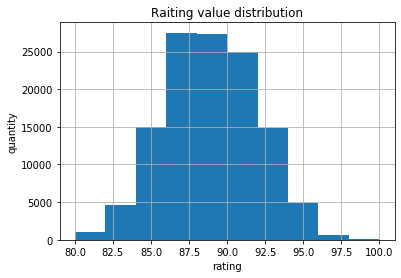

In [60]:
#Посмотрим распределение оценок
ax = data.points.hist()
ax.set_title('Raiting value distribution')
ax.set_xlabel('rating')
ax.set_ylabel('quantity')

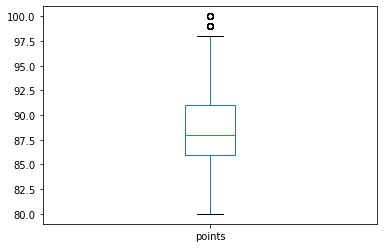

In [9]:
data.points.plot(kind='box')

Все оценки в рейтинге выше 80 баллов с медианой около 88. Максимальный балл 100 получили единицы оцениваемых вин


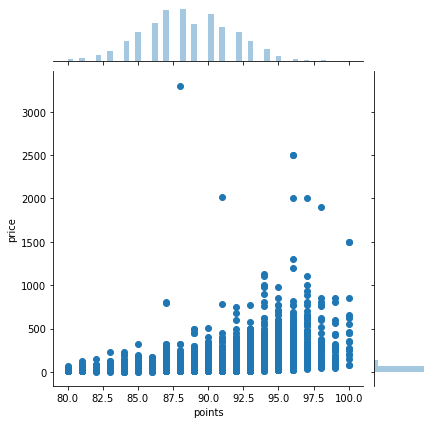

In [33]:
#Оценим кореляцию между показателями оценок и ценой
sns.jointplot(x='points', y='price', 
              data=data, kind='scatter')

В ценовой категории до примерно 200 уе есть представителии всех оценок от 80 до 99
А в ценовой категории выше примерно 200 уе преимущественно вина с оценками больше 90 
При этом самое дорогое вино с ценой больше 3000 - имеет оценку всего около 85 баллов

[Text(0, 0, 'Pinot Noir'),
 Text(0, 0, 'Cabernet Sauvignon'),
 Text(0, 0, 'Chardonnay'),
 Text(0, 0, 'Red Blend'),
 Text(0, 0, 'Bordeaux-style Red Blend')]

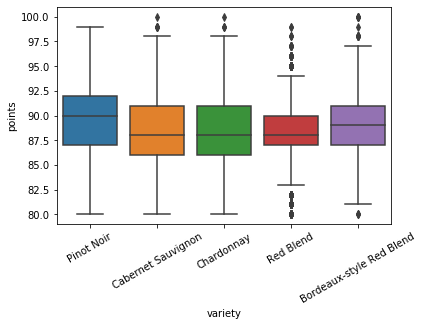

In [27]:
#посмотрим оценки по 5 самым полулярным сортам винограда
top_variety = data['variety'].value_counts().sort_values(ascending = False).head(5).index.values
top_variety
ax = sns.boxplot(x='variety', y='points', data=data[data.variety.isin(top_variety)])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

Самые высокие оценки у вин, произведенных из винограда Pinot Noir
Вина из сортов Cabernet Sauvignon и Chardonnay имеют приблизительно одинаковые оценки
Сорт винограда Red Blend самый противоречивый для экспертов - много выбросов как снизу так и сверху

In [57]:
#Посмотрим распределение кол-ва вин по странам производства и сортам винограда, взяв самые популярные

top_country = data['country'].value_counts().sort_values(ascending = False).head(10).index.values
data_new = data[data.variety.isin(top_variety) & data.country.isin(top_country)]

country_variety = data_new.pivot_table(
                        index='variety', 
                        columns='country', 
                        values='title', 
                        aggfunc='count').fillna(0).applymap(float)
country_variety

country,Argentina,Australia,Austria,Chile,France,Germany,Italy,Portugal,Spain,US
variety,,,,,,,,,,
Bordeaux-style Red Blend,86.0,29.0,2.0,37.0,3173.0,0.0,2.0,5.0,9.0,1817.0
Cabernet Sauvignon,536.0,263.0,5.0,764.0,53.0,0.0,118.0,15.0,52.0,7280.0
Chardonnay,289.0,395.0,54.0,510.0,2230.0,5.0,312.0,17.0,71.0,6773.0
Pinot Noir,103.0,127.0,83.0,358.0,1576.0,55.0,6.0,15.0,11.0,9857.0
Red Blend,227.0,66.0,82.0,404.0,270.0,8.0,3263.0,7.0,808.0,2948.0


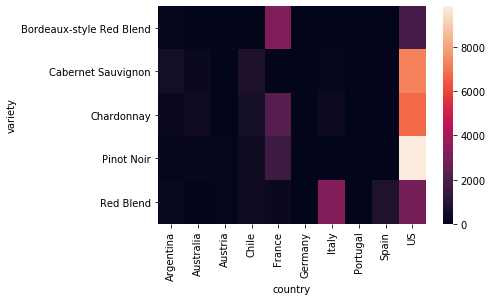

In [58]:
ax = sns.heatmap(country_variety)

Больше всего в данных представленно вин из Америки, присутсвуют вина из всех сортов винограда, но самое большое кол-во из сорта Pinot Noir
На втром месте вина из Франции, но тут есть представители только трех сортов винограда - Bordeaux-style Red Blend, Chardonnay и Pinot Noir
На третьем месте вина из Италии и только в одном сорте - Red Blend

Остальные страны представлены незначительным количеством вин